In [13]:
#Testing

# Explore here

In [14]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
data = pd.read_csv(url, sep=";")
data.head(7)

print("\nRemoving 'duration' column to prevent data leakage...")
data = data.drop(columns=['duration'])
print(f"New shape: {data.shape}")

print(data.shape)
data.info()


Removing 'duration' column to prevent data leakage...
New shape: (41188, 20)
(41188, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null 

In [15]:
# Checking Balance
count = data['y'].value_counts(normalize=True)
print(count)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64



=== EDA ===


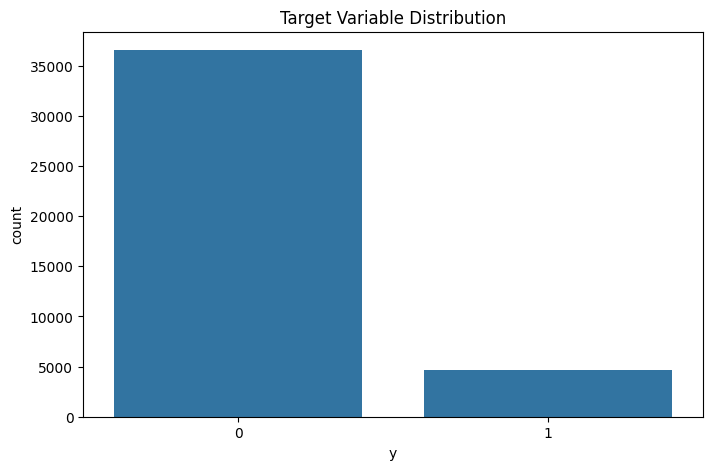

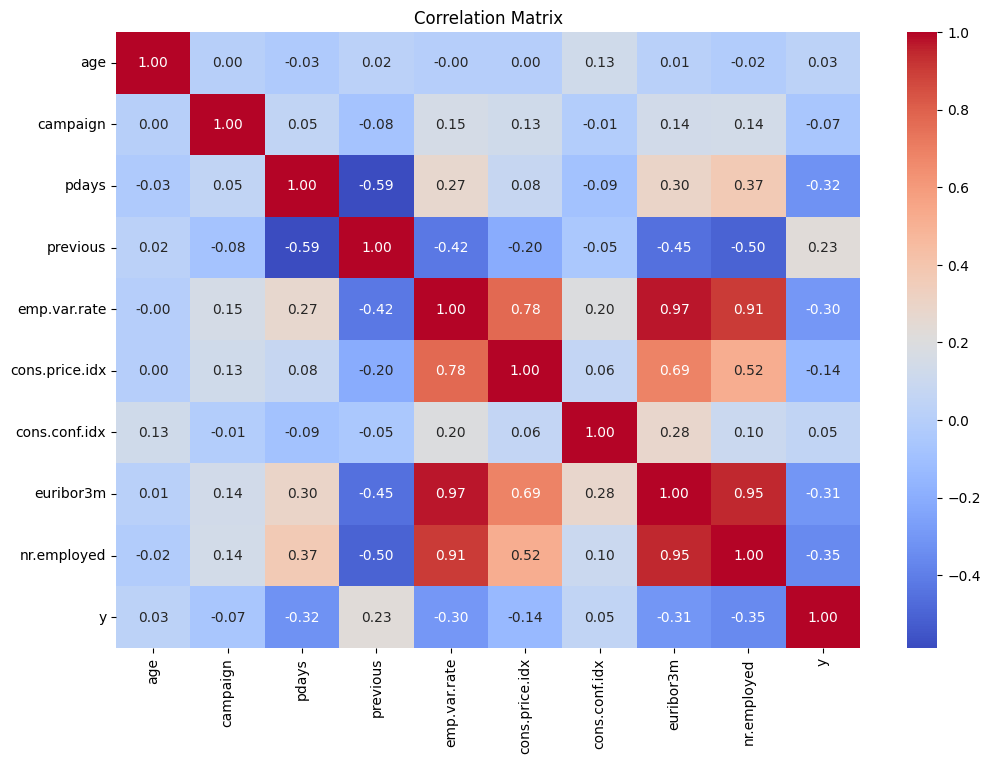

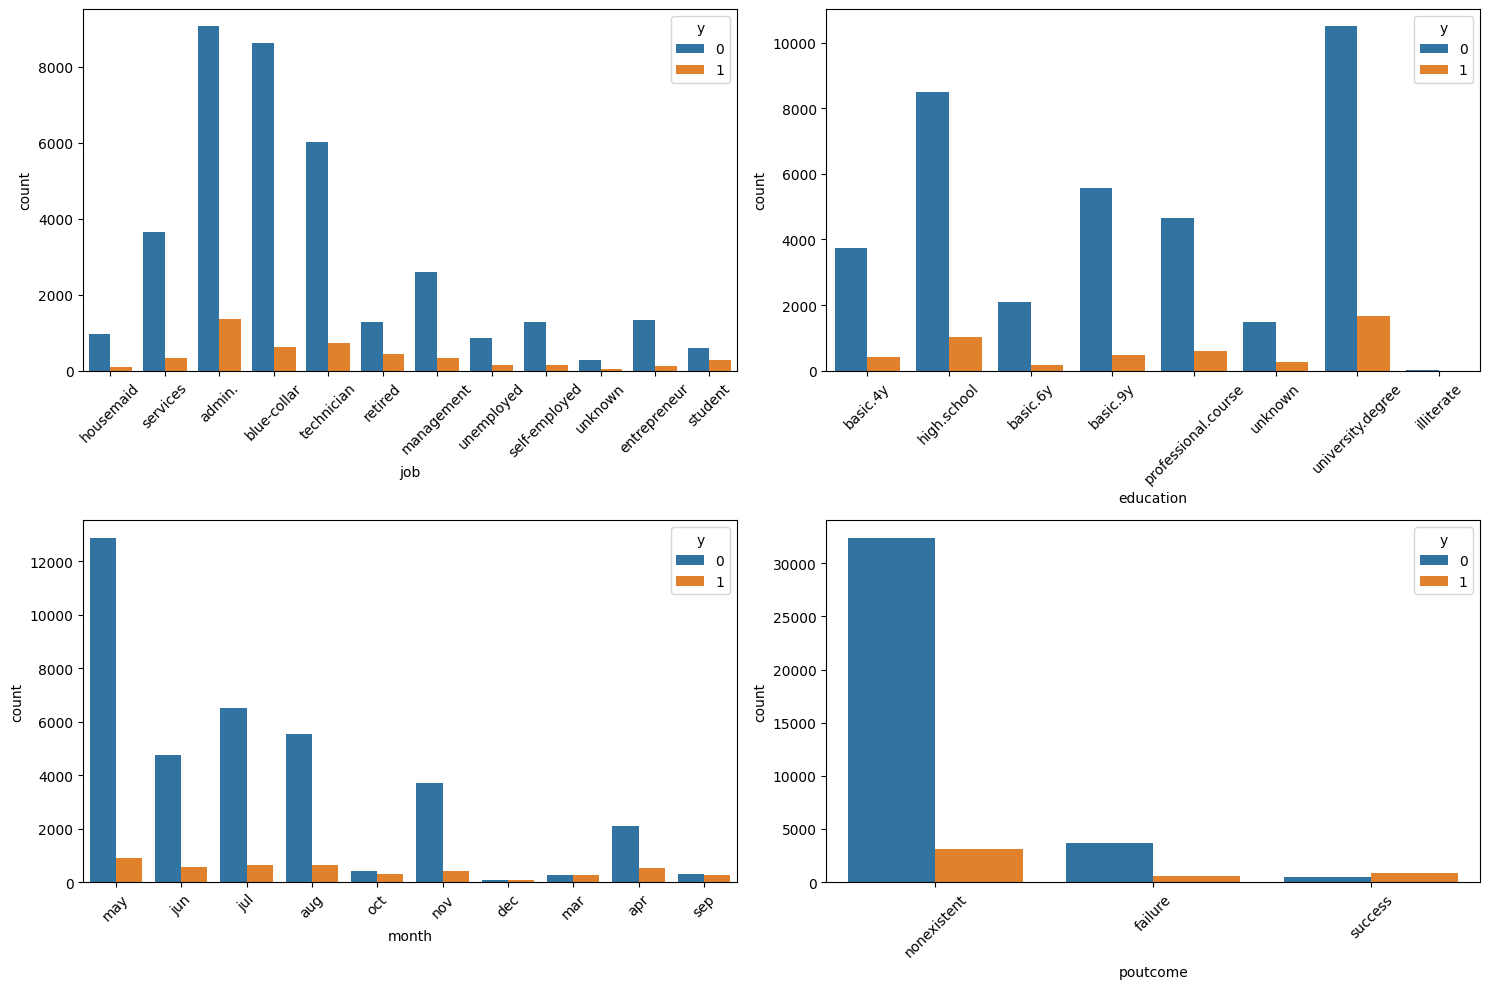

EDA visualizations saved to directory
(32950, 19)
(8238, 19)


In [16]:
# Transforming target variable y from categorical into binary
data['y'] = (data['y'] == 'yes').astype(int)

print("\n=== EDA ===")

# 1. Target distribution
plt.figure(figsize=(8,5))
sns.countplot(x='y', data=data)
plt.title('Target Variable Distribution')
plt.savefig('target_distribution.png')  # Save for later reference
plt.show()

# 2. Correlation matrix (numerical only)
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# 3. Key categorical analysis
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(ax=axes[0,0], x='job', hue='y', data=data)
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[0,1], x='education', hue='y', data=data)
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1,0], x='month', hue='y', data=data)
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1,1], x='poutcome', hue='y', data=data)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_analysis.png')
plt.show()

print("EDA visualizations saved to directory")

# Separating target(y) from the features (X)
X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

In [17]:
# Identifying numeral and categorical col names from the training data
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Scale numerical data for model
# OneHotEncoder help me in two things, it will convert  categorical data into variables and with the "unkwown" feature, if the test has data the training didnt have. 
preprocessor = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    remainder='passthrough')

# Apply the preprocessor
# we do both fit and transform on the training data    
X_train_processed = preprocessor.fit_transform(X_train)
# We only transform the test data using the same transformer
X_test_processed = preprocessor.transform(X_test)

print(X_train_processed.shape)
print(X_test_processed)

(32950, 62)
[[-0.77033007  0.88631588  0.19658384 ...  0.          1.
   0.        ]
 [-0.28972159 -0.56702251  0.19658384 ...  0.          1.
   0.        ]
 [ 3.17065947 -0.20368791  0.19658384 ...  0.          1.
   0.        ]
 ...
 [-0.67420837 -0.56702251  0.19658384 ...  1.          0.
   0.        ]
 [ 0.38313029  1.61298507  0.19658384 ...  0.          1.
   0.        ]
 [ 0.19088689  0.88631588  0.19658384 ...  0.          1.
   0.        ]]


In [18]:
# Train and check the model

# Basic LogisticRegression model
log_reg =LogisticRegression(random_state = 42, max_iter=1000)

# Train the model 
log_reg.fit(X_train_processed, y_train)

# Make predictions

y_pred = log_reg.predict(X_test_processed)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9009

Confusion Matrix:
 [[7219   91]
 [ 725  203]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [19]:
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Baseline Model Accuracy: 0.9009468317552805

Confusion Matrix:
[[7219   91]
 [ 725  203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



Aqui el problema que podemos ver es que para los que no tienen sub, tenemos alto recall y precision pero no es lo mismo para los que si la tienen.
Por ende, nuestro modelo es solamente buen en detectar no subs.

Intentare optimizarlo usando classweight=balanced

In [20]:
# Try 2

# New model
log_reg_balanced = LogisticRegression(random_state = 42, class_weight = 'balanced', max_iter = 2000)

# Training
log_reg_balanced.fit(X_train_processed, y_train)

# Predict

y_pred_balanced = log_reg_balanced.predict(X_test_processed)

# Get predicted probabilities
y_proba = best_model.predict_proba(X_test_processed)[:, 1]

# Find optimal threshold
from sklearn.metrics import recall_score

thresholds = np.linspace(0.1, 0.5, 30)
recall_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba > thresh).astype(int)
    recall_scores.append(recall_score(y_test, y_pred_thresh))

# Find best threshold
best_idx = np.argmax(recall_scores)
best_threshold = thresholds[best_idx]

print(f"\nOptimal threshold: {best_threshold:.4f}")
print(f"Best recall: {recall_scores[best_idx]:.4f}")

# Apply optimal threshold
y_pred_optimized = (y_proba > best_threshold).astype(int)

# Evaluate optimized predictions
print("\n=== Optimized Model ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Plot threshold analysis
plt.figure(figsize=(10,6))
plt.plot(thresholds, recall_scores, 'b-')
plt.plot(best_threshold, recall_scores[best_idx], 'ro')
plt.xlabel('Threshold')
plt.ylabel('Recall Score')
plt.title('Threshold Optimization')
plt.savefig('threshold_optimization.png')
plt.show()

print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))



NameError: name 'best_model' is not defined